# MSE

In [ ]:
import sympy as sp

mu = sp.symbols('mu')
sigma = sp.symbols('sigma')
x_i = sp.symbols('x_i')

log_likelihood = sp.log((1) / )  - (x_i - mu)**2 / (2 * sigma**2)

derivative_mu = sp.diff(log_likelihood, mu)

print("Função log-verossimilhança:")
sp.pprint(log_likelihood)
print("\nDerivada parcial em relação a μ:")
sp.pprint(derivative_mu)

Função log-verossimilhança:
                   2
   ⎛√2⎞   (-μ + xᵢ) 
log⎜──⎟ - ──────────
   ⎝2 ⎠         2   
             2⋅σ    

Derivada parcial em relação a μ:
-(2⋅μ - 2⋅xᵢ) 
──────────────
        2     
     2⋅σ      


In [ ]:
import sympy as sp

# Definindo os símbolos
mu, sigma = sp.symbols('mu sigma')
N = sp.symbols('N', integer=True, positive=True)  # Número de observações
i = sp.symbols('i', integer=True)                # Índice do somatório
x = sp.IndexedBase('x')                          # Variável indexada para os dados

MSE = (1/N) * sp.Sum((x[i] - mu)**2, (i, 1, N))

# Derivada parcial em relação a mu
#derivative_mu = sp.diff(log_likelihood, mu)

# Resolvendo para mu
#solucao_mu = sp.solve(log_likelihood, mu)

# Exibindo os resultados
print("Função MSE simplificada:")
sp.pprint(MSE)  # Extrai a solução da lista





Função MSE simplificada:
  N               
 ___              
 ╲                
  ╲              2
  ╱   (-μ + x[i]) 
 ╱                
 ‾‾‾              
i = 1             
──────────────────
        N         


# Binary Cross-Entropy

In [2]:
import numpy as np

def binary_cross_entropy(y_true, y_pred):
    N = len(y_true)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

y_true = np.array([1, 0, 1])
y_pred = np.array([0.9, 0.2, 0.8])
print(binary_cross_entropy(y_true, y_pred))

0.18388253942874858


# Stochastic Gradiend Descent

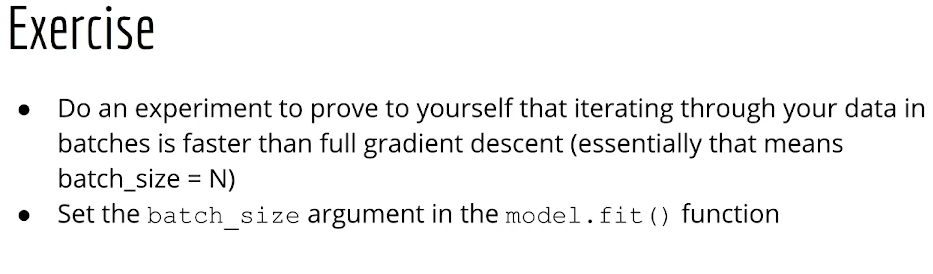

In [ ]:
import tensorflow as tf
import numpy as np
import time
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 784).astype('float32') / 255.0
X_test = X_test.reshape(-1, 784).astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(batch_size):
    model = build_model()
    start_time = time.time()

    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=5,
        validation_data=(X_test, y_test),
        verbose=0
    )

    training_time = time.time() - start_time
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return training_time, loss, accuracy

batch_sizes = [len(X_train), 32]

print("Comparação de Tempo e Desempenho:")
print("---------------------------------")
for batch_size in batch_sizes:
    time_spent, loss, acc = train_and_evaluate(batch_size)
    method = "Batch GD" if batch_size == len(X_train) else "Mini-Batch SGD"
    print(f"{method} (batch_size={batch_size}):")
    print(f"  Tempo por 5 épocas: {time_spent:.2f}s")
    print(f"  Loss de validação: {loss:.4f}")
    print(f"  Acurácia: {acc*100:.2f}%")
    print("---------------------------------")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Comparação de Tempo e Desempenho:
---------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Batch GD (batch_size=60000):
  Tempo por 5 épocas: 12.95s
  Loss de validação: 2.3465
  Acurácia: 7.52%
---------------------------------
Mini-Batch SGD (batch_size=32):
  Tempo por 5 épocas: 41.90s
  Loss de validação: 0.2164
  Acurácia: 93.77%
---------------------------------


# Momentum

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [6]:
iris = load_iris()
X, y = iris.data, iris.target
X = StandardScaler().fit_transform(X)  # normalização
y = tf.keras.utils.to_categorical(y)  # codificação one-hot

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def build_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(3, activation='softmax')
    ])
    return model

def train_model(momentum_value):
    model = build_model()
    optimizer = SGD(learning_rate=0.05, momentum=momentum_value)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=100,
                       batch_size=16,
                       verbose=0)
    return history.history

# treinamento
history_no_momentum = train_model(momentum_value=0.0) # 0% de inercia
history_with_momentum = train_model(momentum_value=0.9) # 90% de inercia na direção anterior

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


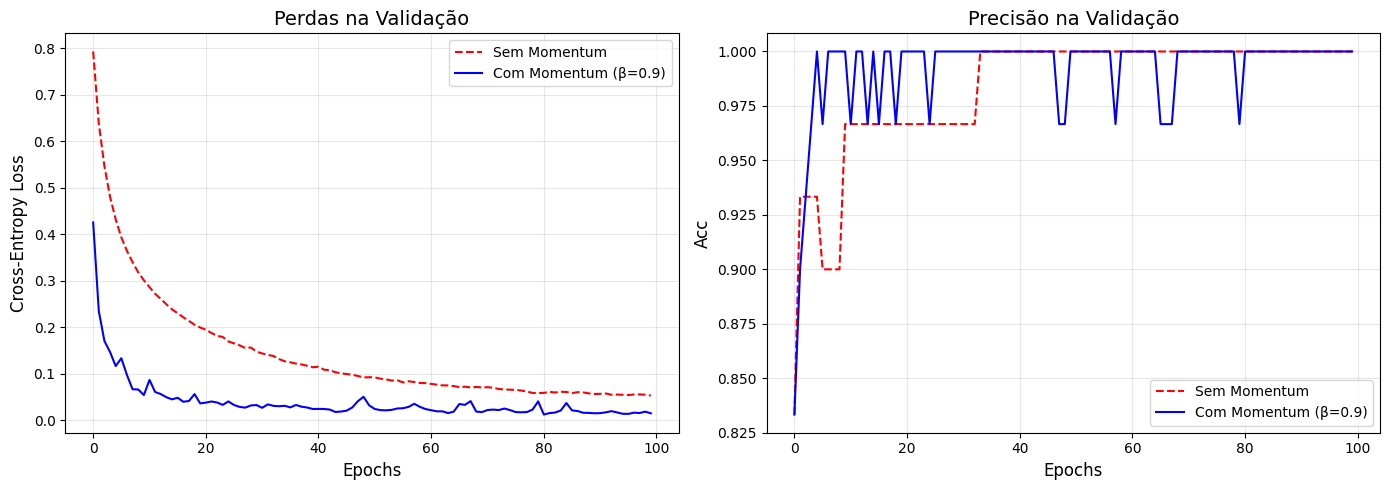

In [7]:
plt.figure(figsize=(14, 5))

# perdas
plt.subplot(1, 2, 1)
plt.plot(history_no_momentum['val_loss'], label='Sem Momentum', color='red', linestyle='--')
plt.plot(history_with_momentum['val_loss'], label='Com Momentum (β=0.9)', color='blue')
plt.title('Perdas na Validação', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Cross-Entropy Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# precisão
plt.subplot(1, 2, 2)
plt.plot(history_no_momentum['val_accuracy'], label='Sem Momentum', color='red', linestyle='--')
plt.plot(history_with_momentum['val_accuracy'], label='Com Momentum (β=0.9)', color='blue')
plt.title('Precisão na Validação', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Acc', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# taxas de aprendizado variáveis e adaptativas

## EWMA

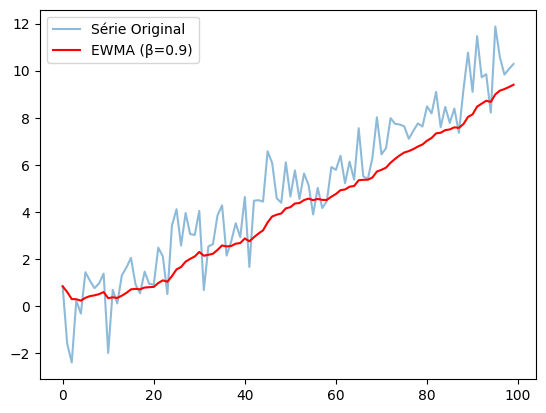

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(100) # eixo temporal
x = 0.1 * t + np.random.randn(100) # distribuição linear com ruído

beta = 0.9
y = np.zeros_like(x)
y[0] = x[0]
for i in range(1, len(x)):
    y[i] = beta * y[i-1] + (1 - beta) * x[i]

plt.plot(t, x, label='Série Original', alpha=0.5)
plt.plot(t, y, label=f'EWMA (β={beta})', color='red')
plt.legend()
plt.show()